# Figure 4

In [1]:
options(warn=-1)

In [2]:
library_load <- suppressMessages(
    
    suppressWarnings(
        
        list(
        
            # Seurat 
            library(Seurat), 

            # TradeSeq
            library(CellChat),

            # Data 
            library(tidyverse), 
            library(data.table), 

            # miloR
            library(miloR), 
            library(ggbeeswarm), 

            # Plotting 
            library(ggplot2), 
            library(patchwork), 
            library(ComplexHeatmap), 
            library(circlize), 
            library(viridis), 
            library(ggplotify), 
            library(ggrepel), 
            library(cowplot), 

            # Pyhton compatibility
            library(reticulate)

        )
    )
)

In [3]:
# Configure reticulate 
# use_condaenv(condaenv="p.3.10.16-FD20200109SPLENO", conda="/nobackup/peer/fdeckert/miniconda3/bin/conda", required=NULL)
# py_config()

In [4]:
random_seed <- 42
set.seed(random_seed)

In [5]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [6]:
# Source
source("bin/so_pl.R")
source("bin/dea_pl.R")
source("bin/gsea_pp.R")
source("bin/gsea_pl.R")
source("bin/cci_pp.R")
source("bin/cci_pl.R")

In [7]:
# Plotting Theme
source("plotting_global.R")
ggplot2::theme_set(theme_global_set(size_select=4)) # From project global source()

# Load reference data 

In [8]:
tf <- read.table("/research/peer/fdeckert/reference/animaltfdb/Mus_musculus_TF.txt")[[2]]

lr <- CellChat::CellChatDB.mouse[[1]] %>% dplyr::select(pathway_name, ligand, receptor.symbol, receptor.family, annotation) %>% dplyr::filter(annotation %in% c("Cell-Cell Contact", "Secreted Signaling", "ECM-Receptor")) %>% 
    separate_rows(receptor.symbol, sep=", ") %>% dplyr::distinct() %>%
    separate_rows(ligand, sep=", ") %>% dplyr::distinct() %>% 
    dplyr::rename(pathway=pathway_name, receptor=receptor.symbol, family=receptor.family)

# DEA overview 

In [9]:
adj_pval_thr <- 0.05
log2_thr <- 0.50

In [10]:
contrasts_vec <- c("IFNAR_fl_CpG_D1", "IFNAR_fl_Baseline_D0")
dea_res_1 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [11]:
contrasts_vec <- c("IFNAR_fl_CpG_D3", "IFNAR_fl_Baseline_D0")
dea_res_2 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [12]:
mat_1 <- lapply(dea_res_1, function(x) {x %>% dplyr::filter(p_val_adj <= adj_pval_thr & abs(avg_log2FC)>=log2_thr) %>% dplyr::pull(gene) %>% length}) %>% data.frame() %>% t()
mat_2 <- lapply(dea_res_2, function(x) {x %>% dplyr::filter(p_val_adj <= adj_pval_thr & abs(avg_log2FC)>=log2_thr) %>% dplyr::pull(gene) %>% length}) %>% data.frame() %>% t()

In [13]:
mat <- cbind(mat_1, mat_2) %>% data.frame() %>% dplyr::rename(Ctr_vs_D1=X1, Ctr_vs_D3=X2)

In [14]:
pdf("result/figures/figure_4/hm_dea_cg.pdf", width=1.5, height=3)

draw(dea_res_hm(as.matrix(mat), fontsize_select=2))

dev.off()

pdf 
  2

# DEA Volcano plots  

In [15]:
contrasts_vec <- c("IFNAR_fl_CpG_D1", "IFNAR_fl_Baseline_D0")
dea_res_1 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [16]:
contrasts_vec <- c("IFNAR_fl_CpG_D3", "IFNAR_fl_Baseline_D0")
dea_res_2 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [17]:
v_pl_1 <- v_pl(dea_res_1[["cMo"]], title="cMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_2 <- v_pl(dea_res_1[["intMo"]], title="intMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_3 <- v_pl(dea_res_1[["RPM"]], title="RPM", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_4 <- v_pl(dea_res_1[["ncMo"]], title="ncMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_5 <- v_pl(dea_res_1[["cDC2"]], title="cDC2", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)

In [18]:
v_pl_6 <- v_pl(dea_res_2[["cMo"]], title="cMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_7 <- v_pl(dea_res_2[["intMo"]], title="intMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_8 <- v_pl(dea_res_2[["RPM"]], title="RPM", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_9 <- v_pl(dea_res_2[["ncMo"]], title="ncMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_10 <- v_pl(dea_res_2[["cDC2"]], title="cDC2", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$infection["CpG"]), color_neg=unlist(color$infection["NaCl"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)

In [19]:
pdf("result/figures/figure_4/v_pl_cg.pdf", width=5*2.5, height=4)

gridExtra::grid.arrange(
    
    v_pl_1 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_2 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_3 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_4 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_5 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_6 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")),
    v_pl_7 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_8 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_9 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_10 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), ncol=5

)

dev.off()

pdf 
  2

# DEA GSEA 

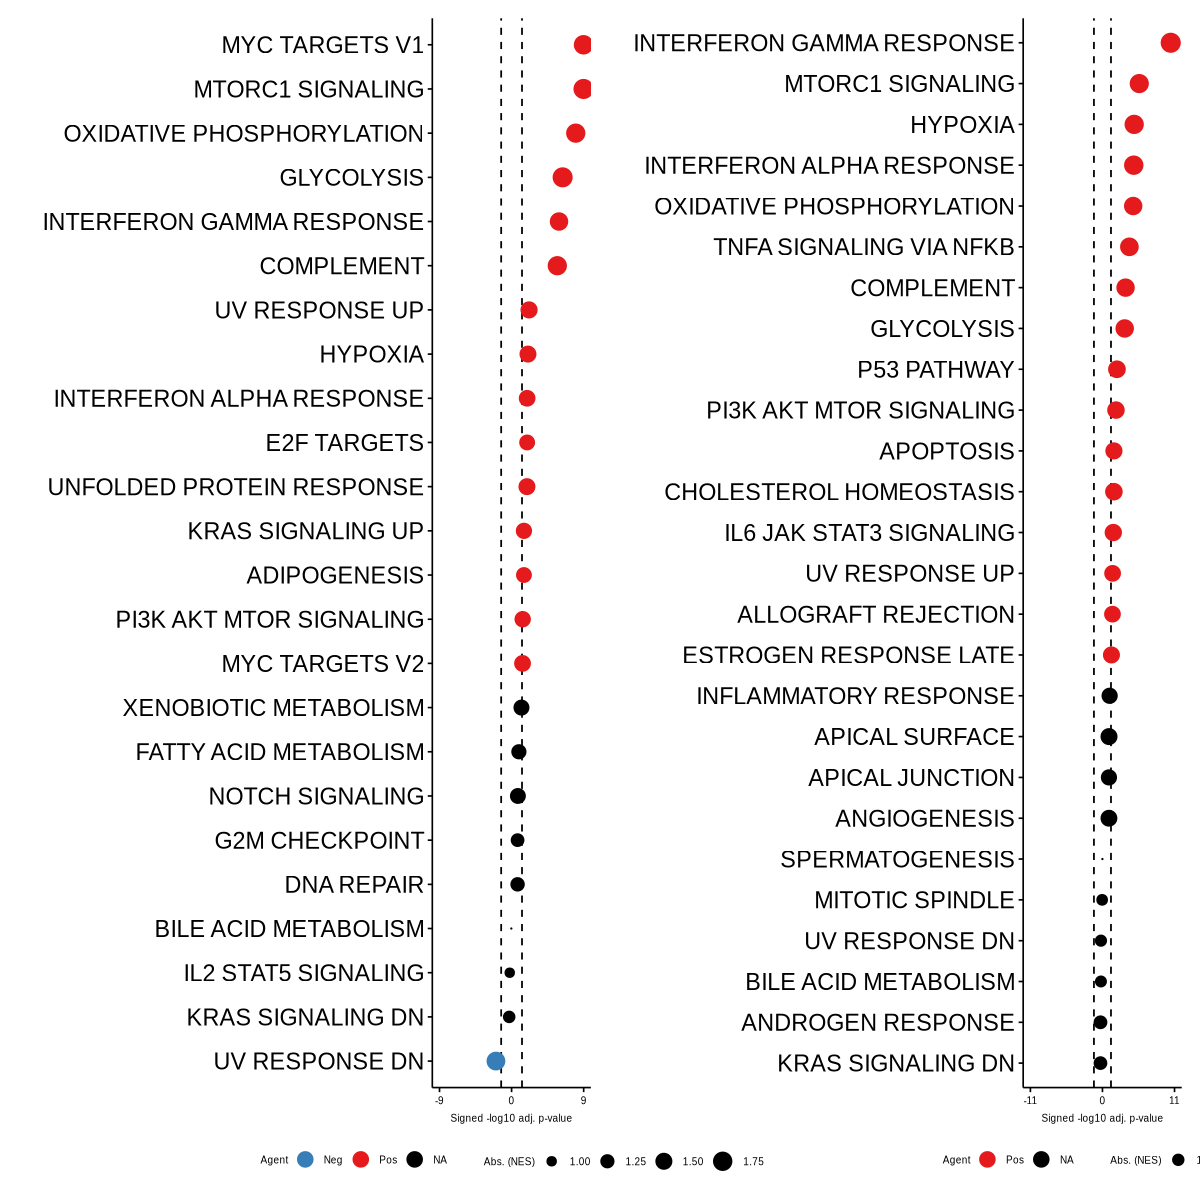

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
source("bin/gsea_pp.R")
source("bin/gsea_pl.R")
gsea_res_1 <- gsea(dea_res_1[["cMo"]])
gsea_res_2 <- gsea(dea_res_2[["cMo"]])
gsea_pl(gsea_res_1, pathway_suffix="HALLMARK") + 
gsea_pl(gsea_res_2, pathway_suffix="HALLMARK")

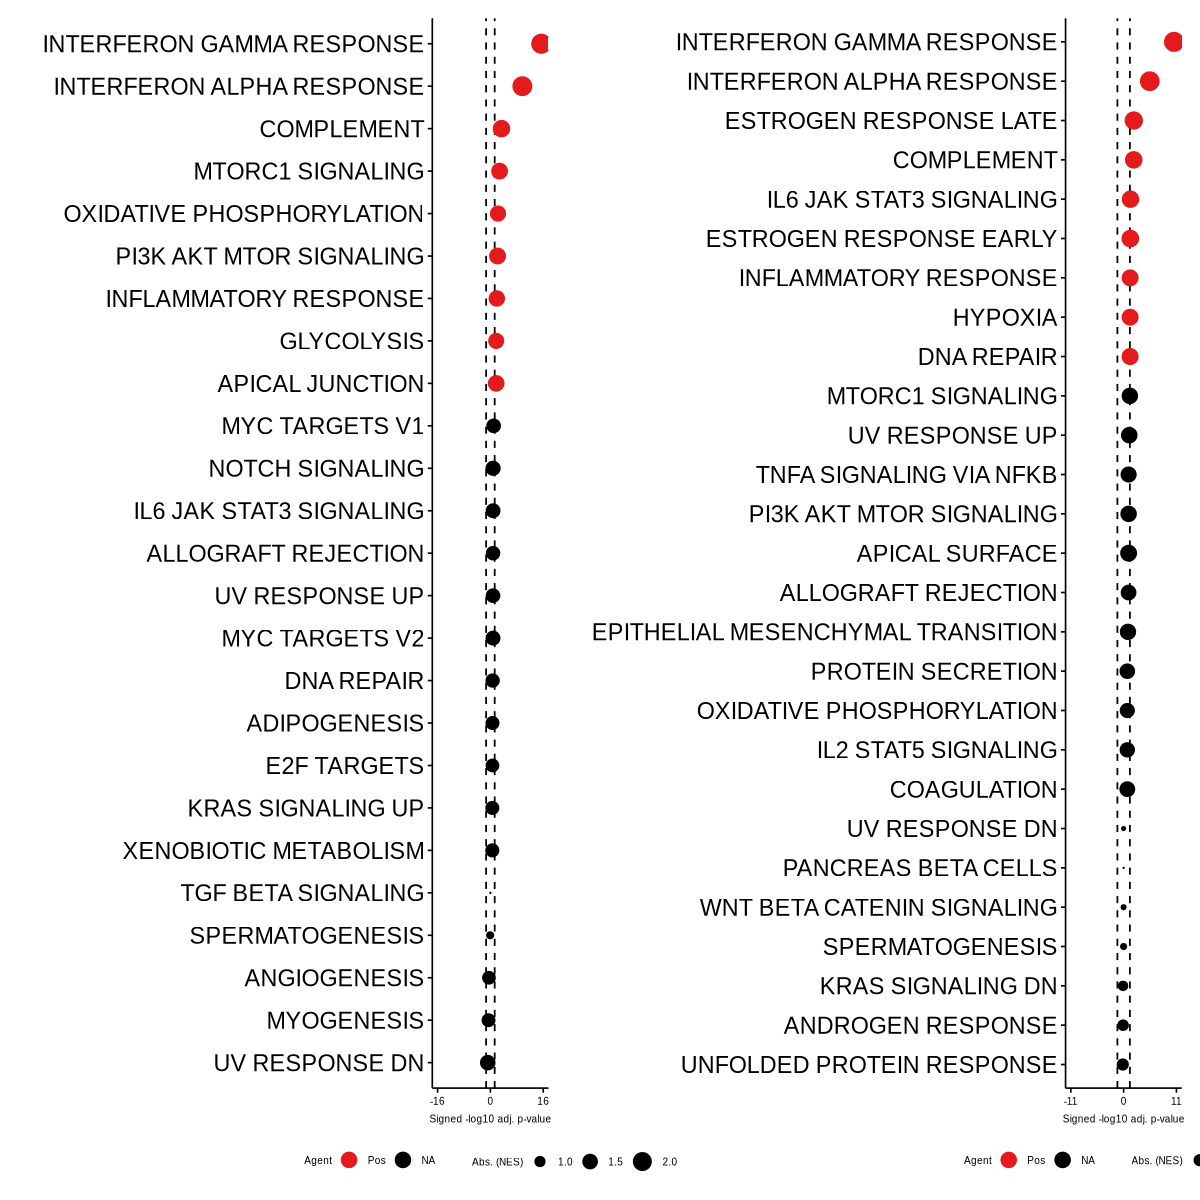

In [21]:
options(repr.plot.width=10, repr.plot.height=10)

gsea_res_1 <- gsea(dea_res_1[["intMo"]])
gsea_res_2 <- gsea(dea_res_2[["intMo"]])
gsea_pl(gsea_res_1, pathway_suffix="HALLMARK") + 
gsea_pl(gsea_res_2, pathway_suffix="HALLMARK")

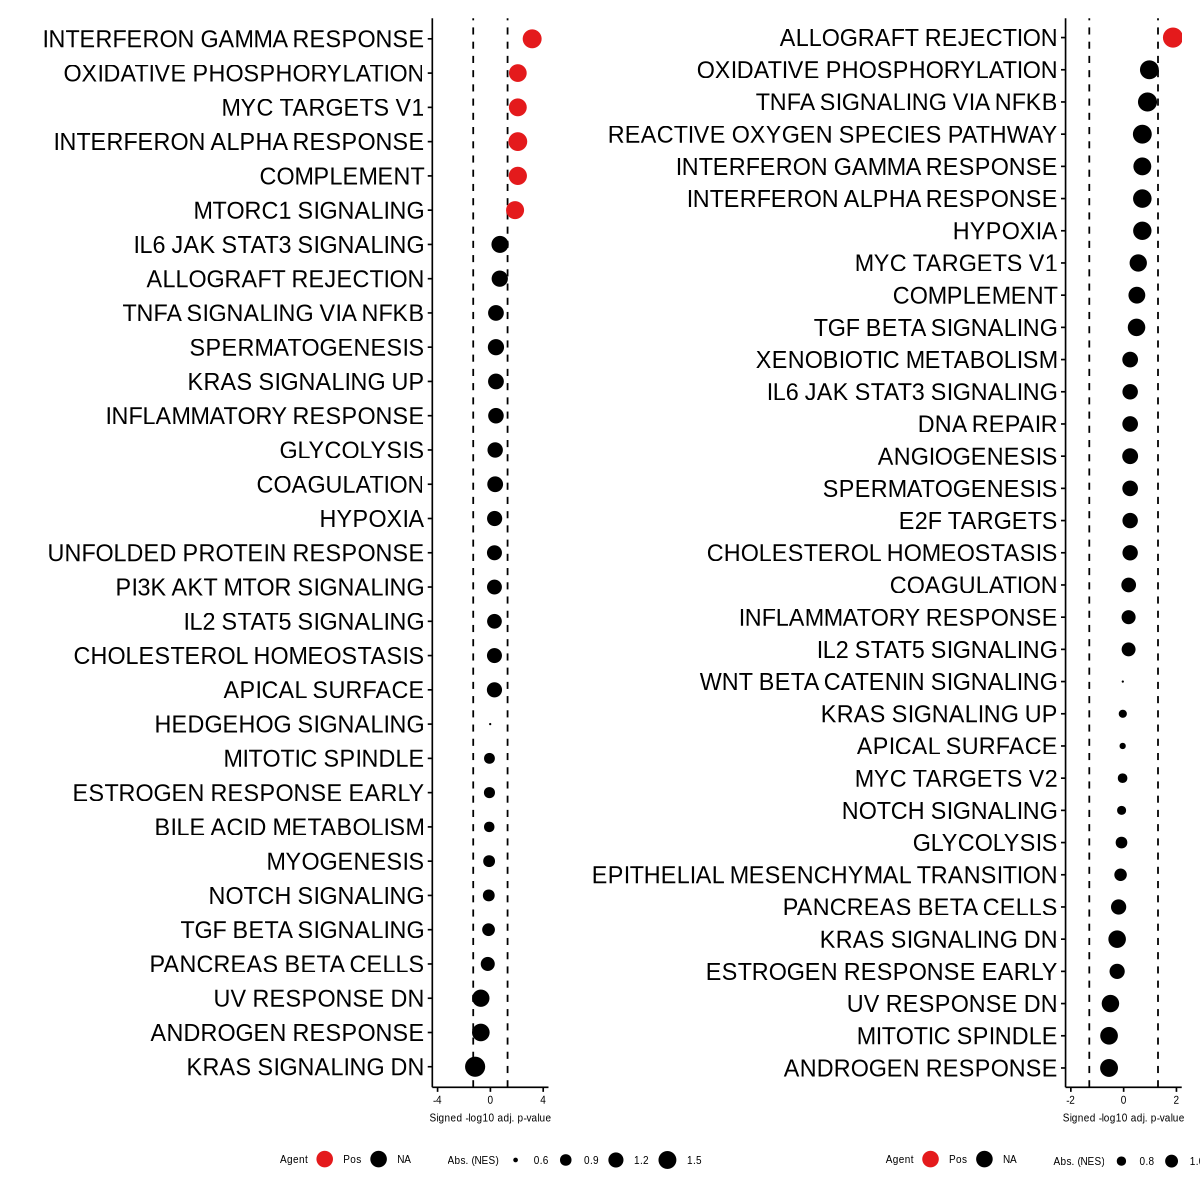

In [22]:
options(repr.plot.width=10, repr.plot.height=10)

gsea_res_1 <- gsea(dea_res_1[["RPM"]])
gsea_res_2 <- gsea(dea_res_2[["RPM"]])
gsea_pl(gsea_res_1, pathway_suffix="HALLMARK") + 
gsea_pl(gsea_res_2, pathway_suffix="HALLMARK")

# DEA heatmap 

In [ ]:
contrasts_vec <- c("IFNAR_fl_CpG_D1", "IFNAR_fl_Baseline_D0")
dea_res_1 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [ ]:
contrasts_vec <- c("IFNAR_fl_CpG_D3", "IFNAR_fl_Baseline_D0")
dea_res_2 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [ ]:
dea_res_1 <- lapply(names(dea_res_1), function(i) {dea_res_1[[i]] %>% dplyr::mutate(col_split=i)})
dea_res_2 <- lapply(names(dea_res_2), function(i) {dea_res_2[[i]] %>% dplyr::mutate(col_split=i)})

In [ ]:
dea_res_1 <- lapply(dea_res_1, function(x) {x$col_name <- "D1"; return(x)})
dea_res_2 <- lapply(dea_res_2, function(x) {x$col_name <- "D3"; return(x)})

In [ ]:
dea_res_1 <- do.call("rbind", dea_res_1)
dea_res_2 <- do.call("rbind", dea_res_2)

In [ ]:
dea_res <- rbind(dea_res_1, dea_res_2)

In [ ]:
genes <- dea_res %>% dplyr::filter(col_split %in% col_split_select & p_val_adj <= adj_pval_thr & abs(avg_log2FC)>=log2_thr) %>% dplyr::pull(gene) %>% unique()

In [ ]:
col_split_select <- c("cMo", "intMo", "RPM")
gene_select <- c(
    
    "Mki67", 
    "Spic", 
    "Ly6c2", 
    "Adgre", 
    "Cd163", 
    "Arg1", 
    "Gdf15", 
    "Spi1", 
    "Mertk", "Axl", "Timd4", "Marco",  
    "Cebpa", "Cebpb", "Nr4a1", 
    grep("Myc", genes, value=TRUE), 
    grep("Maf", genes, value=TRUE), 
    grep("Jun", genes, value=TRUE), 
    grep("H2-", genes, value=TRUE), 
    grep("Klf", genes, value=TRUE), 
    grep("Nfkb", genes, value=TRUE), 
    grep("Stat", genes, value=TRUE), 
    grep("Ifit", genes, value=TRUE), 
    grep("Irf", genes, value=TRUE),
    grep("Oas", genes, value=TRUE),
    grep("Mx", genes, value=TRUE), 
    grep("Isg", genes, value=TRUE), 
    grep("Ccl", genes, value=TRUE),
    grep("Ccr", genes, value=TRUE),
    grep("Cxcl", genes, value=TRUE), 
    grep("Cxcr", genes, value=TRUE), 
    grep("Il", genes, value=TRUE), 
    grep("Tgf", genes, value=TRUE), 
    grep("Hif", genes, value=TRUE),
    grep("Itga", genes, value=TRUE),
    grep("Itgb", genes, value=TRUE),
    grep("Icam", genes, value=TRUE),
    grep("Vcam", genes, value=TRUE)

)

gene_select <- gene_select[gene_select %in% genes]

adj_pval_thr <- 0.05

In [ ]:
mat <- dea_res %>% dplyr::filter(col_split %in% col_split_select & gene %in% gene_select & p_val_adj <= adj_pval_thr)

In [ ]:
mat$gene <- factor(mat$gene, levels=gene_select)

In [ ]:
mat <- tidyr::pivot_wider(
    mat,
    id_cols=c(col_split, col_name),
    names_from=gene,
    values_from=avg_log2FC,
    values_fill=NA
)

In [ ]:
dea_hm <- function(mat, row_labels, row_splits, gene_order, dea_p_value_thr=0.01, width=1.4, height=1.2, use_raster=FALSE, fontsize_select=1) {
    
    # Set font size 
    fontsize <- list(size_1=c(16, 18), size_2=c(6, 8))[[fontsize_select]]
    fontsize_scale <- c(1, 0.5)[[fontsize_select]]

    # Store components 
    col_split <- factor(mat$col_split, levels=c("cMo", "intMo", "RPM"))
    col_name <- mat$col_name
    
    mat <- mat %>% dplyr::select(-col_split, -col_name) %>% t()
    mat <- mat[gene_order, ]

    colnames(mat) <- col_name
    
    # Column annotation     
    top_annotation <- HeatmapAnnotation(

        df=data.frame(col_split=col_split), 
        col=list(col_split=color$celltype_low), 
        simple_anno_size=unit(fontsize_scale*5, "mm"), 
        show_annotation_name=FALSE, 
        show_legend=FALSE, 
        border=TRUE

    )

    # Color mat 
    color <- c(rev(RColorBrewer::brewer.pal(11,"RdBu"))[1], "#FFFFFF", rev(RColorBrewer::brewer.pal(11,"RdBu"))[11])
    breaks <- seq(-2, 2, length.out=3)
    color_function_mat <- circlize::colorRamp2(breaks, color)
    
    # TF heatmap 
    hm <- Heatmap(

        matrix=mat, 

        col=color_function_mat, 
        
        width=fontsize_scale*5*ncol(mat)*unit(width, "mm"),
        height=fontsize_scale*5*nrow(mat)*unit(height, "mm"), 

        row_title_gp=gpar(fontsize=fontsize[1], fontface="bold"), 

        # column_title=lr_type, 
        column_title_gp=gpar(fontsize=fontsize[1], fontface="bold"), 

        row_names_gp=gpar(fontsize=fontsize[1], fontface="italic"), 
        column_names_gp=gpar(fontsize=fontsize[1], fontface="plain"), 
        
        cluster_rows=FALSE, 
        # row_labels=row_labels, 
        cluster_row_slices=FALSE, 
        show_row_dend=FALSE,   
        # row_split=row_splits, 
        row_title=NA, 
        row_title_rot=0, 
        row_gap=unit(fontsize_scale*2, "mm"),
        show_row_names=TRUE,
        # row_names_side=ifelse(lr_type=="Ligand", "left", "right"),

        cluster_columns=FALSE,
        clustering_distance_columns="pearson", 
        cluster_column_slices=FALSE, 
        show_column_dend=TRUE, 
        column_split=col_split,
        column_gap=unit(fontsize_scale*2, "mm"), 
        column_dend_height=unit(fontsize_scale*3, "mm"), 
        show_column_names=TRUE, 

        top_annotation=top_annotation, 

        heatmap_legend_param=list(title="log2FC", at=c(min(breaks), 0, max(breaks)), title_gp=gpar(fontsize=fontsize[1], fontface="plain"), labels_gp=gpar(fontsize=fontsize[1]), legend_height=unit(fontsize_scale*15, "mm"), grid_width=unit(fontsize_scale*3, "mm")), 

        border=TRUE, 
        rect_gp=gpar(col="black", lwd=unit(fontsize_scale*2*0.6667, "pt")), 
        border_gp=gpar(col="black", lwd=unit(fontsize_scale*3*0.6667, "pt")),

        use_raster=FALSE, raster_by_magick=TRUE, raster_resize_mat=mean
              
    )

    return(hm)
    
}

In [ ]:
pdf("hm_dea_wt_d1_d3_vs_ctl.pdf", width=3, height=20)

dea_hm(mat, gene_order=gene_select, fontsize_select = 2)

dev.off()

In [ ]:
options(repr.plot.width=10, repr.plot.height=30)

dea_hm(mat, gene_order=gene_select)

# CellChat overview 

In [ ]:
cco_1 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_baseline_d0.rds")
cco_2 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_cpg_d1.rds")
cco_3 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_cpg_d3.rds")

In [ ]:
cco_diff_1 <- list(IFNAR_fl_Baseline_D0=cco_1, IFNAR_fl_CpG_D1=cco_2)
cco_diff_1 <- mergeCellChat(cco_diff_1, add.names=names(cco_diff_1))
cco_diff_1@meta$sample_group <- factor(cco_diff_1@meta$sample_group, levels=c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D1"))

In [ ]:
cco_diff_2 <- list(IFNAR_fl_Baseline_D0=cco_1, IFNAR_fl_CpG_D3=cco_2)
cco_diff_2 <- mergeCellChat(cco_diff_2, add.names=names(cco_diff_2))
cco_diff_2@meta$sample_group <- factor(cco_diff_2@meta$sample_group, levels=c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3"))

## Interaction count 

In [ ]:
source <- NULL
target <- c("MEP", "Proerythroblast", "Erythroblast")

In [ ]:
pdf("result/figures/figure_4/hm_net_ctr_cg.pdf", width=2.5, height=2.5)

gridExtra::grid.arrange(
    
   hm_net(cellchat=cco_1, slot="count", source=source, target=target, title="Interaction count Ctr", breaks_max=30, fontsize_select=2) %>% ggplotify::as.ggplot()

)

dev.off()

In [ ]:
pdf("result/figures/figure_4/hm_net_d1_cg.pdf", width=2.5, height=2.5)

gridExtra::grid.arrange(
    
   hm_net(cellchat=cco_2, slot="count", source=source, target=target, title="Interaction count D1", breaks_max=30, fontsize_select=2) %>% ggplotify::as.ggplot()

)

dev.off()

In [ ]:
pdf("result/figures/figure_4/hm_net_d3_cg.pdf", width=2.5, height=2.5)

gridExtra::grid.arrange(
    
   hm_net(cellchat=cco_3, slot="count", source=source, target=target, title="Interaction count D3", breaks_max=30, fontsize_select=2) %>% ggplotify::as.ggplot()

)

dev.off()

# CCI DEA 

In [ ]:
# Parameter 
pval_prob_thr <- 0.05
p_val_adj_dea <- 0.05
pathway_name_thr <- c("ICAM", "VCAM", "SIRP", "KIT", "TGFb", "TNF", "CXCL", "CCL")

# CellChat results
lr_res <- read.csv("result/cci/lr_res.csv", row.names=1)

# Add reversed Cell-cell interactions 
db <- CellChat::CellChatDB.mouse

# Impute custom interactions
options(stringsAsFactors=FALSE)
interaction <- read.csv("data/reference/cellchat/interaction.csv", row.names=1, na.strings=c(""))
interaction[is.na(interaction)] <- ""
db$interaction <- rbind(db$interaction, interaction)

# Get cell-cell contact interaction 
db <- CellChat::subsetDB(db, search=c("Cell-Cell Contact"), key="annotation")

# Subset lr results for cell-cell contact forward 
lr_res_ccc_fwd <- lr_res %>% dplyr::filter(lr_res$interaction_name %in% db$interaction$interaction_name)

# Reverse cell-cell contact 
lr_res_ccc_rev <- data.frame(

    source=lr_res_ccc_fwd$target, 
    target=lr_res_ccc_fwd$source, 
    interaction_name=paste0(lr_res_ccc_fwd$receptor_symbol, "_", lr_res_ccc_fwd$ligand_symbol), 
    prob=lr_res_ccc_fwd$prob, 
    pval=lr_res_ccc_fwd$pval, 
    pathway_name=lr_res_ccc_fwd$pathway_name, 
    ligand_symbol=lr_res_ccc_fwd$receptor_symbol, 
    receptor_symbol=lr_res_ccc_fwd$ligand_symbol, 
    sample_group=lr_res_ccc_fwd$sample_group
    
)

# Combine results 
lr_res_ccc <- rbind(lr_res_ccc_fwd, lr_res_ccc_rev)

# Assemble LR results 
lr_res <- rbind(lr_res[!lr_res$interaction_name %in% lr_res_ccc$interaction_name, ], lr_res_ccc)

# Subset by interaction pathway
lr_res <- lr_res[lr_res$pathway_name %in% pathway_name_thr, ]
lr_res$pathway_name <- factor(lr_res$pathway_name, levels=pathway_name_thr)

# DEA results 

In [ ]:
dea_res_1 <- readRDS("result/dea/scRNAseq/wilcox/IFNAR_fl_CpG_D1_vs_IFNAR_fl_Baseline_D0.rds")[c("cMo", "intMo", "RPM", "cDC2", "Basophil", "MEP", "Proerythroblast", "Erythroblast")]
dea_res_1 <- lapply(dea_res_1, function(x) {list("D1"=x)})

In [ ]:
dea_res_2 <- readRDS("result/dea/scRNAseq/wilcox/IFNAR_fl_CpG_D1_vs_IFNAR_fl_Baseline_D0.rds")[c("cMo", "intMo", "RPM", "cDC2", "Basophil", "MEP", "Proerythroblast", "Erythroblast")]
dea_res_2 <- lapply(dea_res_2, function(x) {list("D3"=x)})

In [ ]:
dea_res <- Map(c, dea_res_1, dea_res_2)

## PTPG B (+/+) vs D1 (+/+) and D3 (+/+)

## cMo

In [ ]:
source <- c("cMo")
target <- c("MEP")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_cmo_mep_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("cMo")
target <- c("Proerythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_cmo_proeb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("cMo")
target <- c("Erythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_cmo_eb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

## intMo

In [ ]:
source <- c("intMo")
target <- c("MEP")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_intmo_mep_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("intMo")
target <- c("Proerythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_intmo_proeb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("intMo")
target <- c("Erythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_intmo_eb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

## RPM

In [ ]:
source <- c("RPM")
target <- c("MEP")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_rpm_mep_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("RPM")
target <- c("Proerythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_rpm_proeb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

In [ ]:
source <- c("RPM")
target <- c("Erythroblast")
sample_group <- c("Ctr"="IFNAR_fl_Baseline_D0", "D1"="IFNAR_fl_CpG_D1", "D3"="IFNAR_fl_CpG_D3")

In [ ]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

In [ ]:
pdf("result/figures/figure_4/cci_rpm_eb_cg.pdf", width=5, height=5)

dea_lr_hm(lr_res_i, dea_res, source, target, fontsize_select=2, lr_de_check=TRUE)

dev.off()

# Interaction plots

In [ ]:
sources <- c("RPM", "intMo", "cMo")
targets <- c("MEP", "Proerythroblast", "Erythroblast")

In [ ]:
cco_1 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_baseline_d0.rds")
cco_2 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_cpg_d1.rds")
cco_3 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_cpg_d3.rds")
cco_4 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_lysm_cre_baseline_d0.rds")
cco_5 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_lysm_cre_cpg_d1.rds")
cco_6 <- readRDS("data/scRNAseq/cci/cco_ifnar_fl_lysm_cre_cpg_d3.rds")

In [ ]:
cco_1 <- subsetCellChat(object=cco_1, idents.use=c(sources, targets))
cco_2 <- subsetCellChat(object=cco_2, idents.use=c(sources, targets))
cco_3 <- subsetCellChat(object=cco_3, idents.use=c(sources, targets))
cco_4 <- subsetCellChat(object=cco_4, idents.use=c(sources, targets))
cco_5 <- subsetCellChat(object=cco_5, idents.use=c(sources, targets))
cco_6 <- subsetCellChat(object=cco_6, idents.use=c(sources, targets))

In [ ]:
levels(cco_1@idents) <- c(targets, sources)
levels(cco_2@idents) <- c(targets, sources)
levels(cco_3@idents) <- c(targets, sources)
levels(cco_4@idents) <- c(targets, sources)
levels(cco_5@idents) <- c(targets, sources)
levels(cco_6@idents) <- c(targets, sources)

In [ ]:
color_use <- color$celltype_low[names(color$celltype_low) %in% c(sources, targets)]

In [ ]:
cco_list <- list(cco_1, cco_2, cco_3, cco_4, cco_5, cco_6)

q_prob_thr <- quantile(c(cco_1@net$prob, cco_2@net$prob, cco_3@net$prob), 0.90)
for (i in seq_along(cco_list)) {
    
    prob_arr <- cco_list[[i]]@net$prob
    prob_arr[prob_arr > q_prob_thr] <- q_prob_thr
    cco_list[[i]]@net$prob <- prob_arr
    
}

In [ ]:
pdf("result/figures/figure_4/cp_cci_net_ctl_cg.pdf", width=2.0, height=2.0)

    replayPlot(netVisual_chord_gene(cco_list[[1]], slot.name="net", sources.use=sources, targets.use=targets, signaling=pathway_name_thr, color.use=color_use, title.name=NULL, show.legend=FALSE, small.gap=1, big.gap=5, lab.cex=0.5))

dev.off()

In [ ]:
pdf("result/figures/figure_4/cp_cci_net_d1_cg.pdf", width=2.0, height=2.0)

    replayPlot(netVisual_chord_gene(cco_list[[2]], slot.name="net", sources.use=sources, targets.use=targets, signaling=pathway_name_thr, color.use=color_use, title.name=NULL, show.legend=FALSE, small.gap=1, big.gap=5, lab.cex=0.5))

dev.off()

In [ ]:
pdf("result/figures/figure_4/cp_cci_net_d3_cg.pdf", width=2.0, height=2.0)

    replayPlot(netVisual_chord_gene(cco_list[[3]], slot.name="net", sources.use=sources, targets.use=targets, signaling=pathway_name_thr, color.use=color_use, title.name=NULL, show.legend=FALSE, small.gap=1, big.gap=5, lab.cex=0.5))

dev.off()